In [6]:
from astropy.table import Table
from lens import Lens
from astropy.io import fits
import sqlutil as sqlutil 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import lensutils as util
import numpy as np

In [5]:
#TGASLensId = 5332606518269523072
#querystringTGAS2massLens = 'select j_m,k_m,parallax,phot_g_mean_mag from gaia_dr1_aux.gaia_source_2mass_xm where source_id=' + str(TGASLensId)

##JmagLens,kMagLens,parallaxLens,gMagLens = sqlutil.get(querystringTGAS2massLens,
 #                      db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

In [7]:
querystringTGAS2mass= 'select j_m,k_m,parallax,phot_g_mean_mag from gaia_dr1_aux.gaia_source_2mass_xm limit 1000000'

Jmag,kMag,parallax,gMag = sqlutil.get(querystringTGAS2mass,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

color = Jmag-kMag
nanmask = np.isnan(parallax)

colorf = color[~nanmask]
parallaxf = parallax[~nanmask]
gMagf = gMag[~nanmask]

absmag = gMagf + 5 * (np.log10(parallaxf / 1000.0) + 1)

print(absmag)

[-0.66645826  2.10158746  3.99037509 ...,  2.92345309  4.9552835
  1.43015322]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


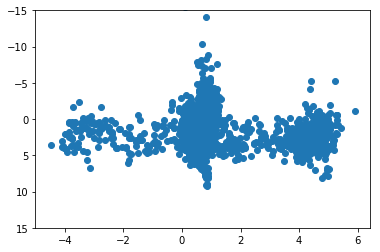

In [8]:
plt.scatter(colorf,absmag)
plt.ylim(15, -15)  # decreasing time
plt.show()
